## 1) trainset / testset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

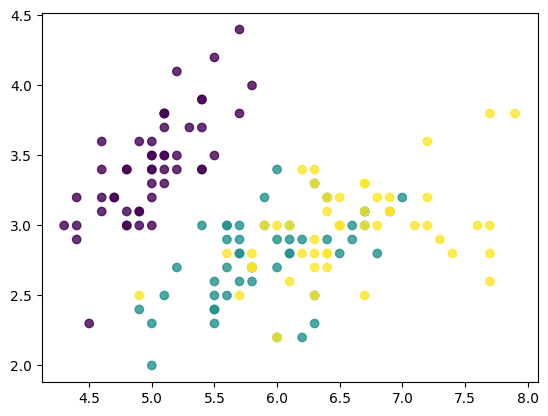

In [2]:
iris = load_iris()

X= iris.data
y= iris.target

plt.scatter(X[:, 0], X[:, 1], c=y, alpha = 0.8)

### séparation des données en deux groupes, un pour entrainer le modèle, un autre pour le tester.

In [3]:
from sklearn.model_selection import train_test_split 
# sépare entre split d'entrainemen et split de test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
#test_size répartie 20% dans le test set et 80% dans le train set.
#random_state permet de contrôler l'aléatoire
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (120, 4)
Test set: (30, 4)


Text(0.5, 1.0, 'Test set')

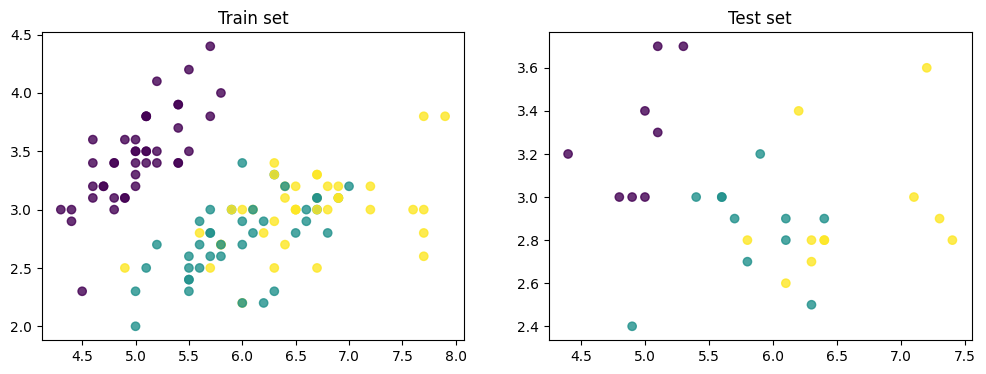

In [5]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title('Test set')

## 2) entrainement d'un modèle de machine learning

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
"""model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
print('Test_score:', model.score(X_test, y_test))"""
#attention => ne pas faire, validation sur les tests qui doivent être utiliser plus tard , passer à l'étape suivante

"model = KNeighborsClassifier(n_neighbors=3)\n\nmodel.fit(X_train, y_train)\nprint('Test_score:', model.score(X_test, y_test))"

### cross validation => validation set

réglage des hyper-paramètres pour l'optimiser et se rapprocher de 1

In [7]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_validation = cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring='accuracy')
cross_validation.mean()

0.9833333333333334

In [43]:
"""val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)
plt.plot(val_score)"""
#utiliser validation_curve pour tester pour faire cette étape

'val_score = []\nfor k in range(1, 50):\n    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()\n    val_score.append(score)\nplt.plot(val_score)'

### validation curve

In [9]:
from sklearn.model_selection import validation_curve

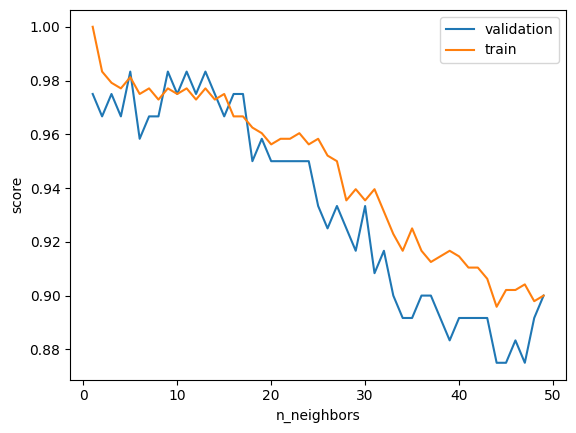

In [58]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors', 
                                        param_range= k, cv=5)
plt.plot(k, val_score.mean(axis=1), label='validation')
plt.plot(k, train_score.mean(axis=1), label='train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

### GridSearchCV

permet de trouver le modèle avec les meilleurs hyperparamètres

In [42]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {'n_neighbors': np.arange(1, 20), 
'metric':['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [54]:
grid.best_score_

0.9833333333333334

In [55]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [56]:
model = grid.best_estimator_

In [57]:
model.score(X_test, y_test)

0.9333333333333333

## confusion metrice

In [52]:
from sklearn.metrics import confusion_matrix

In [53]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

## learning_curve (courbe d'apprentissage)

savoir si notre modèle serait meilleur si on rajoute des données

In [59]:
from sklearn.model_selection import learning_curve

[ 9 19 28 38 48 57 67 76 86 96]


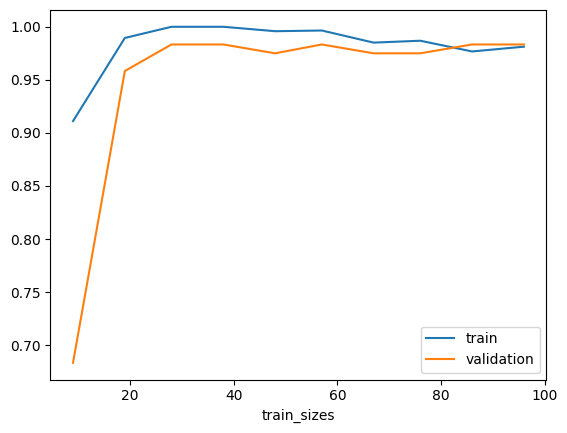

In [63]:
N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                            train_sizes= np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis = 1),label='train')
plt.plot(N, val_score.mean(axis= 1), label='validation')
plt.xlabel('train_sizes')
plt.legend()